# Data Validation
Radial profile on arbitrary star

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from astropy import units as u

In [14]:
blanky = np.ones([100,100])

In [15]:
from radial import radius2d

In [16]:
info = {'position': [49,49]}

In [17]:
r_blanky = radius2d(blanky, info)*u.arcsec

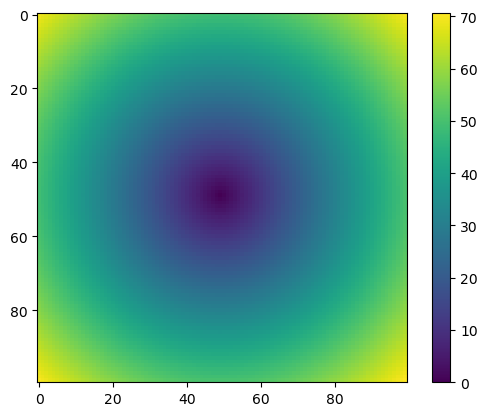

In [18]:
plt.imshow(r_blanky.value)
plt.colorbar()

In [19]:
line_outward = np.arange(50,0,-1)
line_outward

array([50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34,
       33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17,
       16, 15, 14, 13, 12, 11, 10,  9,  8,  7,  6,  5,  4,  3,  2,  1])

In [20]:
np.min(r_blanky)

<Quantity 0. arcsec>

In [21]:
starry = np.ones([blanky.shape[0], blanky.shape[1]])

for i in range(blanky.shape[0]):
    for j in range(blanky.shape[1]):
        r_i = int(np.round(r_blanky[i,j].value))

        if r_i>20:
            starry[i,j] = 1

        else:
            starry[i,j] = line_outward[r_i]


In [22]:
starry = starry.copy()*u.Jy/u.arcsec**2 # make Jy/arc2 so we can use it
starry

<Quantity [[1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           ...,
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.],
           [1., 1., 1., ..., 1., 1., 1.]] Jy / arcsec2>

Text(0, 0.5, 'Pixels')

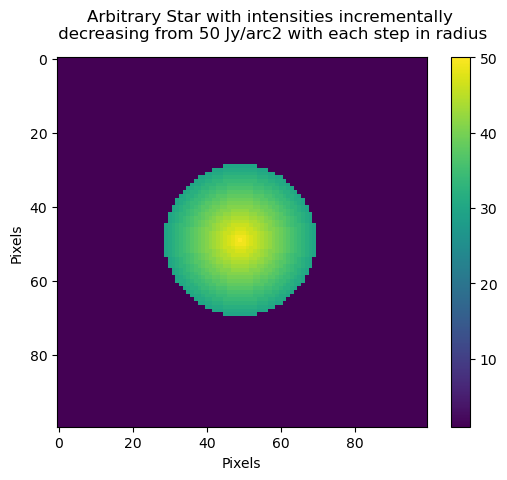

In [23]:
plt.imshow(starry.value)
plt.colorbar()
plt.suptitle("Arbitrary Star with intensities incrementally\n decreasing from 50 Jy/arc2 with each step in radius")
#plt.title("Radius = 20 arc, Background Median = 1 Jy/arc2")

plt.xlabel("Pixels")
plt.ylabel("Pixels")

# x=10
# plt.xlim(49-x,49+x)
# plt.ylim(49-x,49+x)

# radial profile of star with intensities incrementally decreasing from 50 with each pixel
# background is 1

In [24]:
info['pix_size_arcsec'] = 1
info['std'] = 1

In [25]:
from radial import sm

In [26]:
from photutils.aperture import aperture_photometry, CircularAperture, CircularAnnulus

In [27]:
from astropy.stats import sigma_clipped_stats


In [28]:
temp = starry.copy()
temp[np.isnan(temp)]=(10*np.std(temp))
mask = np.abs(temp-np.median(temp))>(3*np.std(temp))
info['mean'], info['median'], info['std'] = sigma_clipped_stats(starry, sigma = 3,mask=mask)
print("Mean: ", info['mean'])
print("Median: ",info['median'])
print("Std: ", info['std'])

Mean:  1.0 Jy / arcsec2
Median:  1.0 Jy / arcsec2
Std:  0.0 Jy / arcsec2


In [29]:
starry.shape[0]-info['position'][0]-1

50

In [30]:
def annulus_stdev(data, radius):
    #cycle through data and radii using title[c]
    stdev = []

    for i in range(198):

        ann = []
        

        r_in = i
        r_out = i+1

        for i in range(data.shape[0]):
            for j in range(data.shape[1]):
                if radius[i,j]>r_in and radius[i,j]<r_out:
                    ann.append(data[i,j])

        stdev.append(np.std(ann))

    return stdev

In [31]:
std = annulus_stdev(starry.value,r_blanky.value)

/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:226: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/Users/iman/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


In [32]:
std

[nan,
 0.0,
 0.4714045207910316,
 0.5,
 0.0,
 0.4948716593053935,
 0.4330127018922193,
 0.4810456929208347,
 0.4985185152621431,
 0.42132504423474304,
 0.4948716593053935,
 0.44221663871405326,
 0.48237638894272,
 0.4898979485566356,
 0.4856209060564557,
 0.49943278484292924,
 0.46013066279384185,
 0.46153846153846156,
 0.4753120259341455,
 0.48521542343000995,
 14.5,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,
 nan,

In [33]:
def rp_annulus(data,info):
    '''
    data, pix size in arcsec, position of center star
    '''

    pix_size_arcsec = info['pix_size_arcsec']
    position = info['position']

    cent = (position[1],position[0])

    #### aperture_size = r_betelgeuse.value / pix_size_arcsec.value #put in pixel units
    ### aperture = CircularAperture(cent,aperture_size)
    ### photometry = aperture_photometry(data,aperture)
    # print()
    # print("Photometry: ", photometry)

    aperture_sizes = np.arange(1,200,1)
    # print("aperture_sizes =", aperture_sizes)
    # print("info_std",info["std"])
    error = np.full((data.shape[0],data.shape[1]),info['median'])*u.Jy/u.arcsec**2
    # print("error =", error)
    annuli=[CircularAnnulus(cent, r_in=aperture_sizes[i], r_out=aperture_sizes[i+1]) for i in range(len(aperture_sizes)-1)]
    # print("annuli =", annuli)
    areas = np.array([circle.area for circle in annuli])#*pix_size_arcsec**2
    # print("areas =", areas)
    # print(apertures)
    
    
    photometry = aperture_photometry(data, annuli,error=error)
    #print(photometry.items())
    phot_list = []
    phot_list_err = []
    
    for k,v in photometry.items():
        # print("k",k)
        # print("v",v)
        if 'aperture_sum' in k and 'err' not in k:
            # print("A ",v)
            phot_list.append(v)
        elif 'aperture_sum_err' in k:
            # print("B",v.value)
            phot_list_err.append(v.value)

    phot_array = np.array(phot_list)
    # print("phot_array",phot_array)
    # print("err",phot_list_err)
    phot_array_err = np.array(phot_list_err)
    #print(phot_list)
    surf_brightness_jy_arc2 = (phot_array.flatten()*u.Jy/u.arcsec**2)/(areas)
    err = phot_array_err.flatten()*u.Jy/u.arcsec**2#/areas
    # surf_brightness_jy_arc2 =( phot_array.flatten()/ (areas)) *u.Jy/u.arcsec**2 #
    # info['error'] = (phot_array_err.flatten()/areas)*u.Jy/u.arcsec**2 #
    #print(err)


    centers_arc = ((aperture_sizes[1:]+aperture_sizes[:-1])/2)*pix_size_arcsec
    centers_pc = sm(168,centers_arc)*u.pc

    centers = {'pc': centers_pc, 'arc': centers_arc}

    info['areas_arc2'] = areas*pix_size_arcsec**2
    info['areas_pix'] = areas
    info['radial_err'] = np.std(surf_brightness_jy_arc2)
    info['annuli'] = annuli
    info['r_edges'] = aperture_sizes

    return centers,surf_brightness_jy_arc2,err

In [34]:
centers, rp_1d,err = rp_annulus(starry, info)

Text(0, 0.5, 'Arbitrary Stdev (Jy/arc2)')

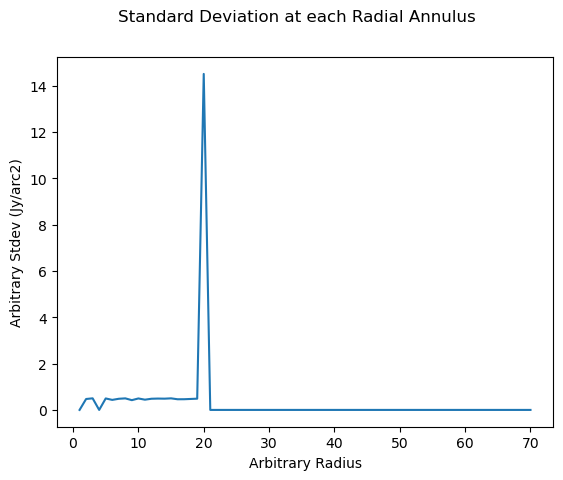

In [35]:
plt.plot(std)
#plt.title("Stdev plot peaks at radius of star because this test star drops off suddenly at r=20. \n This spike is expected because of the sharp drop off, and does not indicate a problem",y=-.25)
#plt.title("This spike is expected because of the sharp drop off, and does not indicate a problem", y=-.35)
plt.suptitle("Standard Deviation at each Radial Annulus")
plt.xlabel("Arbitrary Radius")
plt.ylabel("Arbitrary Stdev (Jy/arc2)")

(-1.0, 1.0)

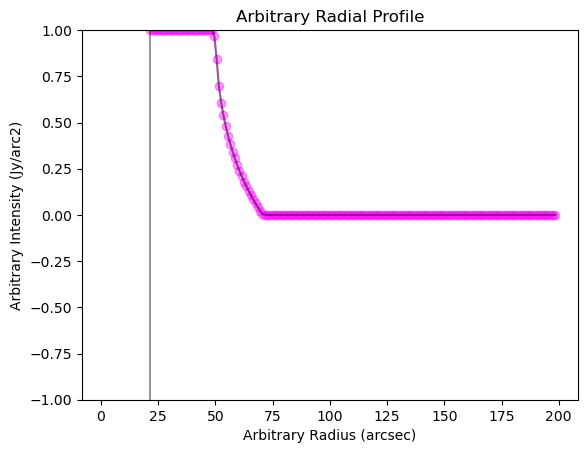

In [36]:
plt.plot(centers['arc'],rp_1d.value,'o-',alpha=0.4,c='fuchsia')
plt.errorbar(centers['arc'],rp_1d.value,yerr=std,alpha=0.4, c= 'black')

plt.title("Arbitrary Radial Profile")
#plt.suptitle("Star with a radius of 20, intensities decreasing by 1 with each pixel width annulus", y=0)
plt.xlabel("Arbitrary Radius (arcsec)")
plt.ylabel("Arbitrary Intensity (Jy/arc2)")
plt.ylim(-1,1)
#plt.errorbar(centers['arc'],rp_1d,yerr=err,c='b')